In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
wifi = pd.read_csv('wifi.csv')

In [3]:
wifi.head(10)

,Wifi 1,Wifi 2,Wifi 3,Wifi 4,Wifi 5,Wifi 6,Wifi 7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
5,-64,-55,-63,-66,-76,-88,-83,1
6,-65,-61,-65,-67,-69,-87,-84,1
7,-61,-63,-58,-66,-74,-87,-82,1
8,-65,-60,-59,-63,-76,-86,-82,1
9,-62,-60,-66,-68,-80,-86,-91,1


In [4]:
X = wifi.drop('Room', axis = 1)
Y= wifi['Room']

In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from keras.utils import to_categorical

le = LabelEncoder()
Y = le.fit_transform(Y)

ohe = OneHotEncoder()
Y = ohe.fit_transform(Y.reshape(-1, 1)).toarray()

In [6]:
Y

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras import initializers
from keras import regularizers

In [10]:
L1 = 256
L2 = 128

model = Sequential()
model.add(Dense(L1, input_dim = 7, activation = 'relu',
               kernel_initializer = 'he_normal',
               kernel_regularizer = regularizers.l2(0.01)))
model.add(Dense(L2, activation='softmax'))

# output layer
model.add(Dense(4, activation = 'softmax'))

In [11]:
model.compile(loss ='categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [12]:
hist = model.fit(X_train, y_train, epochs = 50, batch_size = 100, validation_data = (X_test, y_test))

Epoch 1/50
16/16 [==============================] - 1s 14ms/step - loss: 6.3221 - accuracy: 0.6675 - val_loss: 6.1466 - val_accuracy: 0.8700
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 6.0001 - accuracy: 0.9156 - val_loss: 5.8420 - val_accuracy: 0.9225
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 5.7023 - accuracy: 0.9444 - val_loss: 5.5577 - val_accuracy: 0.9425
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 5.4301 - accuracy: 0.9600 - val_loss: 5.3008 - val_accuracy: 0.9550
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 5.1823 - accuracy: 0.9669 - val_loss: 5.0631 - val_accuracy: 0.9575
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 4.9507 - accuracy: 0.9675 - val_loss: 4.8400 - val_accuracy: 0.9625
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 4.7326 - accuracy: 0.9669 - val_loss: 4.6287 - val_accuracy: 0.9575
Epoch 8/50
16/16 [=

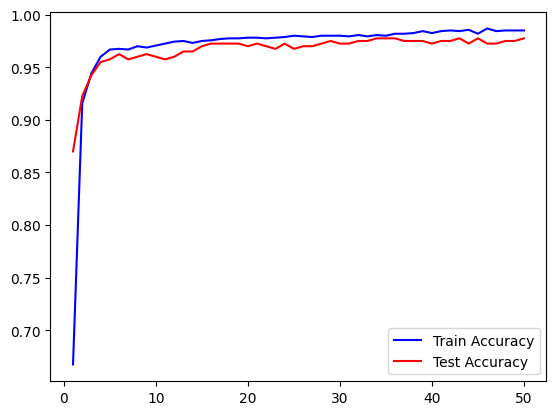

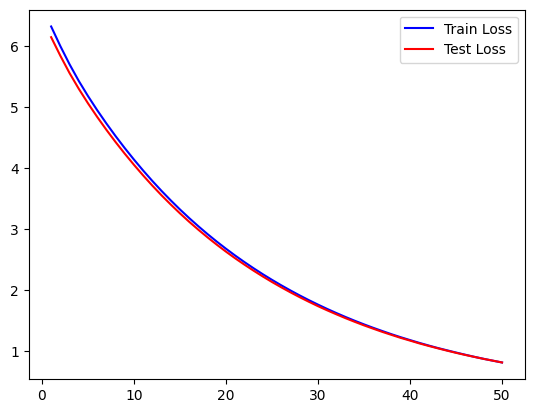

In [13]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = 'Train Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.show()